In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from scipy.stats import binned_statistic

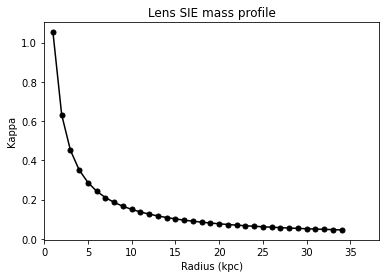

In [53]:
filename = '../sie/out_lens.fits'
hdul = fits.open(filename)
kappa = hdul[0].data[3]

from scipy.stats import binned_statistic
# Define the center of the image
x0 = kappa.shape[0] / 2
y0 = kappa.shape[1] / 2

# Define the radial distances from the center in arc seconds
x_arcsec, y_arcsec = np.meshgrid(np.arange(kappa.shape[0]), np.arange(kappa.shape[1]))
r_arcsec = np.sqrt((x_arcsec - x0)**2 + (y_arcsec - y0)**2) * 0.01  # convert to arc seconds

# Convert arc seconds to kpc
kpc_per_arcsec = 4.51
r_kpc = r_arcsec * kpc_per_arcsec

# Calculate the radial profile
bins_kpc = np.arange(1, 35.1, 1)
radial_sum, _, _ = binned_statistic(r_kpc.flatten(), kappa.flatten(), bins=bins_kpc, statistic='sum')
radial_count, _, _ = binned_statistic(r_kpc.flatten(), kappa.flatten(), bins=bins_kpc, statistic='count')
radial_count[radial_count == 0] = 1e-10  # set zero values to a small non-zero value
radial_profile_sie = radial_sum / radial_count

# Plot the radial profile
fig, ax = plt.subplots()
ax.plot(bins_kpc[:-1], radial_profile_sie, 'ko-', markersize=5)
ax.set_xlabel('Radius (kpc)')
ax.set_ylabel('Kappa')
ax.set_xlim([0, np.max(r_kpc)])
ax.set_xticks(np.arange(0, 35.1, 5))
ax.set_title('Lens SIE mass profile')
plt.show()

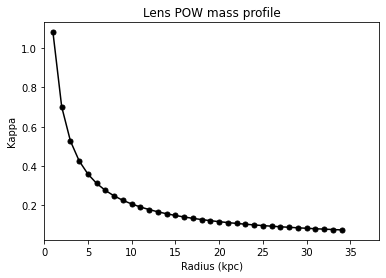

In [54]:
filename = '../pow/out_lens.fits' # plot on ds9
hdul = fits.open(filename)
kappa = hdul[0].data[3]
from scipy.stats import binned_statistic
# Define the center of the image
x0 = kappa.shape[0] / 2
y0 = kappa.shape[1] / 2

# Define the radial distances from the center in arc seconds
x_arcsec, y_arcsec = np.meshgrid(np.arange(kappa.shape[0]), np.arange(kappa.shape[1]))
r_arcsec = np.sqrt((x_arcsec - x0)**2 + (y_arcsec - y0)**2) * 0.01  # convert to arc seconds

# Convert arc seconds to kpc
kpc_per_arcsec = 4.51
r_kpc = r_arcsec * kpc_per_arcsec

# Calculate the radial profile
bins_kpc = np.arange(1, 35.1, 1)
radial_sum, _, _ = binned_statistic(r_kpc.flatten(), kappa.flatten(), bins=bins_kpc, statistic='sum')
radial_count, _, _ = binned_statistic(r_kpc.flatten(), kappa.flatten(), bins=bins_kpc, statistic='count')
radial_count[radial_count == 0] = 1e-10  # set zero values to a small non-zero value
radial_profile_pow = radial_sum / radial_count

# Plot the radial profile
fig, ax = plt.subplots()
ax.plot(bins_kpc[:-1], radial_profile_pow, 'ko-', markersize=5)
ax.set_xlabel('Radius (kpc)')
ax.set_ylabel('Kappa')
ax.set_xlim([0, np.max(r_kpc)])
ax.set_xticks(np.arange(0, 35.1, 5))
ax.set_title('Lens POW mass profile')
plt.show()


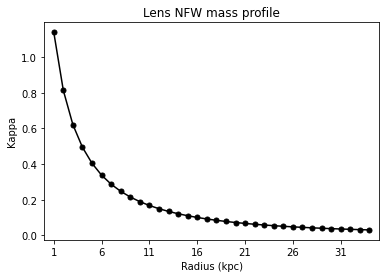

In [55]:
# Mass Profile plots
from astropy.io import fits
filename = '../nfw/out_lens.fits'
hdul = fits.open(filename)
kappa = hdul[0].data[3]

from scipy.stats import binned_statistic
# Define the center of the image
x0 = kappa.shape[0] / 2
y0 = kappa.shape[1] / 2

# Define the radial distances from the center in arc seconds
x_arcsec, y_arcsec = np.meshgrid(np.arange(kappa.shape[0]), np.arange(kappa.shape[1]))
r_arcsec = np.sqrt((x_arcsec - x0)**2 + (y_arcsec - y0)**2) * 0.01  # convert to arc seconds

# Convert arc seconds to kpc
kpc_per_arcsec = 4.51
r_kpc = r_arcsec * kpc_per_arcsec

# Calculate the radial profile
bins_kpc = np.arange(1, 35.1, 1)
radial_sum, _, _ = binned_statistic(r_kpc.flatten(), kappa.flatten(), bins=bins_kpc, statistic='sum')
radial_count, _, _ = binned_statistic(r_kpc.flatten(), kappa.flatten(), bins=bins_kpc, statistic='count')
radial_count[radial_count == 0] = 1e-10  # set zero values to a small non-zero value
radial_profile_nfw = radial_sum / radial_count

# Plot the radial profile
fig, ax = plt.subplots()
ax.plot(bins_kpc[:-1], radial_profile_nfw, 'ko-', markersize=5)
ax.set_xlabel('Radius (kpc)')
ax.set_ylabel('Kappa')
ax.set_xlim([0, 35])
ax.set_xticks(np.arange(1, 35.1, 5))
ax.set_title('Lens NFW mass profile')
plt.show()

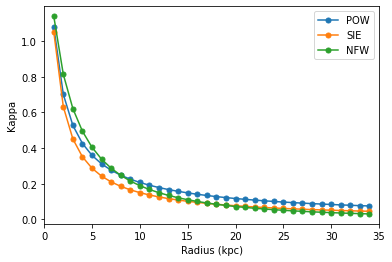

In [60]:
fig, ax = plt.subplots()
ax.plot(bins_kpc[:-1], radial_profile_pow, 'o-', markersize=5, label="POW")
ax.plot(bins_kpc[:-1], radial_profile_sie, 'o-', markersize=5, label="SIE")
ax.plot(bins_kpc[:-1], radial_profile_nfw, 'o-', markersize=5, label="NFW")

ax.set_xlabel('Radius (kpc)')
ax.set_ylabel('Kappa')
ax.set_xlim([0, 35])
plt.legend()
plt.show()
fig.savefig("../fig/mass_profile", dpi=100, facecolor="white")

In [ ]:
ein = 3.16151 #kpc
mass_enclosed = 5.016584e+10

3.16151